Conditional probability - it help in predicting the event and also help 

**Spam Text Classification** 

* N-Gram, Bi-Gram etc.
* Bag of words(BOW)
* Term Frequency Calculation TF
* Inverse Document Frequency IDF
* TF-IDF term frequency - Inverse Document
* Text Classification

**N-Gram**

please turn your page
* Unigram : please | turn | your | page
* BIgram : please turn | turn your  | your page
* Trigram : please turn your | turn your page

You can think of an N-gram as the sequence of N words, by that notion, a 2-gram (or bigram) is a two-word sequence of words like "please turn", "turn your", or "your page", and a 3-gram (or trigram) is a three-word sequence of words like "please turn your", or "turn your page"

**Language model** - arrange sentence in a certain order.

**Bag of Words (BOW)**



**term Frequency **

**Code Along**

In [13]:
from sklearn.feature_extraction.text import CountVectorizer    # countvectorizizer - convert text into numeric format

In [14]:
import pandas as pd
import numpy as np

In [19]:
x = ['Which book is this', 'this is book and this is math']

In [20]:
cv = CountVectorizer()
count = cv.fit_transform(x)

In [21]:
count.toarray()  # BoW

array([[0, 1, 1, 0, 1, 1],
       [1, 1, 2, 1, 2, 0]])

In [22]:
cv.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['and', 'book', 'is', 'math', 'this', 'which']

In [23]:
bow = pd.DataFrame(count.toarray(), columns = cv.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [24]:
bow

,and,book,is,math,this,which
0,0,1,1,0,1,1
1,1,1,2,1,2,0


**Term Frequency**

In [27]:
bow

,and,book,is,math,this,which
0,0,1,1,0,1,1
1,1,1,2,1,2,0


In [25]:
bow.shape

(2, 6)

In [26]:
tf = bow.copy()
for index, row in enumerate(tf.iterrows()):
  print(row[1])
  print()

and      0
book     1
is       1
math     0
this     1
which    1
Name: 0, dtype: int64

and      1
book     1
is       2
math     1
this     2
which    0
Name: 1, dtype: int64



In [28]:
tf = bow.copy()
for index, row in enumerate(tf.iterrows()):
  for col in row[1].index:
    tf.loc[index, col] = tf.loc[index, col]/sum(row[1].values)

In [29]:
tf

,and,book,is,math,this,which
0,0.000000,0.250000,0.250000,0.000000,0.250000,0.25
1,0.142857,0.142857,0.285714,0.142857,0.285714,0.00


**Inverse Document Frequency IDF**

idf = log( (1+N)/(n + 1)) + 1 used in sklearn when smooth_idf = True.

where, N is the total number of rows and n is the number of rows in which the word was present.

In [30]:
bow

,and,book,is,math,this,which
0,0,1,1,0,1,1
1,1,1,2,1,2,0


In [31]:
bb = bow.astype('bool')
bb

,and,book,is,math,this,which
0,False,True,True,False,True,True
1,True,True,True,True,True,False


In [32]:
bb['is'].sum()

2

In [33]:
cols = bb.columns
cols

Index(['and', 'book', 'is', 'math', 'this', 'which'], dtype='object')

In [35]:
nz = []
for col in cols:
  nz.append(bb[col].sum())
nz

[1, 2, 2, 1, 2, 1]

In [38]:
N = 2
idf = []
for index, col in enumerate(cols):
  idf.append(np.log((N + 1)/(nz[index] + 1)) + 1)
idf

[1.4054651081081644, 1.0, 1.0, 1.4054651081081644, 1.0, 1.4054651081081644]

In [39]:
x

['Which book is this', 'this is book and this is math']

**TFIDF - TF * IDF** 

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [44]:
x

['Which book is this', 'this is book and this is math']

In [45]:
tfidf = TfidfVectorizer()
x = tfidf.fit_transform(x)

In [46]:
print(x.toarray())

[[0.         0.44832087 0.44832087 0.         0.44832087 0.63009934]
 [0.39054766 0.27787788 0.55575576 0.39054766 0.55575576 0.        ]]


In [47]:
idf

[1.4054651081081644, 1.0, 1.0, 1.4054651081081644, 1.0, 1.4054651081081644]

In [48]:
print(tfidf.idf_)

[1.40546511 1.         1.         1.40546511 1.         1.40546511]


**Load Span Dataset**

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [51]:
df = pd.read_csv('spam.tsv', sep='\t')
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [52]:
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [53]:
df.shape

(5572, 4)

In [55]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

**Balance Dataset**

In [56]:
ham = df[df['label']=='ham']
ham.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
6,ham,Even my brother is not like to speak with me. ...,77,2


In [57]:
spam = df[df['label']=='spam']
spam.head()

,label,message,length,punct
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
5,spam,FreeMsg Hey there darling it's been 3 week's n...,147,8
8,spam,WINNER!! As a valued network customer you have...,157,6
9,spam,Had your mobile 11 months or more? U R entitle...,154,2
11,spam,"SIX chances to win CASH! From 100 to 20,000 po...",136,8


In [61]:
ham.shape, spam.shape

((4825, 4), (747, 4))

In [62]:
ham = ham.sample(spam.shape[0])

In [63]:
ham.shape, spam.shape

((747, 4), (747, 4))

In [65]:
data = ham.append(spam, ignore_index=True)
data.sample(5)

,label,message,length,punct
331,ham,You will be in the place of that man,36,0
1197,spam,URGENT! Your Mobile number has been awarded wi...,126,3
615,ham,I met you as a stranger and choose you as my f...,147,9
53,ham,"Storming msg: Wen u lift d phne, u say ""HELLO""...",324,38
1361,spam,URGENT! This is the 2nd attempt to contact U!U...,142,6


**Exploratory Data Analysis**

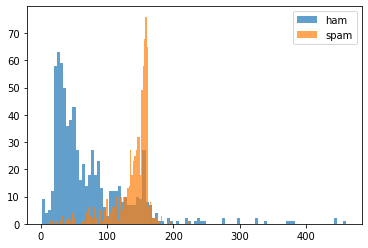

In [66]:
plt.hist(ham['length'], bins=100, alpha=0.7, label='ham')
plt.hist(spam['length'], bins=100, alpha=0.7, label='spam')
plt.legend()
plt.show()

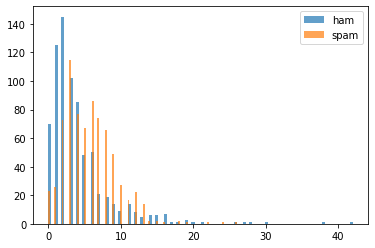

In [67]:
plt.hist(ham['punct'], bins=100, alpha=0.7, label='ham')
plt.hist(spam['punct'], bins=100, alpha=0.7, label='spam')
plt.legend()
plt.show()

**Data Preparation for Training**

In [134]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline  import Pipeline

In [73]:
data.head()

,label,message,length,punct
0,ham,OH FUCK. JUSWOKE UP IN A BED ON A BOATIN THE D...,108,5
1,ham,TaKe CaRE n gET WeLL sOOn,25,0
2,ham,Nothing but we jus tot u would ask cos u ba gu...,151,12
3,ham,Ok..,4,2
4,ham,Can you call me plz. Your number shows out of ...,139,5


In [79]:
tfidf = TfidfVectorizer()
x = tfidf.fit_transform(data['message'])

x = x.toarray()
y = data['label']

In [84]:
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [85]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0, stratify=data['label'])

In [86]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(1195, 4646) (1195,)
(299, 4646) (299,)


**Training Your First Text Classifier**

In [87]:
clf = RandomForestClassifier(n_estimators=100, n_jobs = -1)

In [88]:
clf.fit(x_train, y_train)

RandomForestClassifier(n_jobs=-1)

In [89]:
y_pred = clf.predict(x_test)

In [92]:
confusion_matrix(y_test, y_pred)

array([[150,   0],
       [ 16, 133]])

In [133]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.91      1.00      0.95       150
        spam       1.00      0.90      0.95       149

    accuracy                           0.95       299
   macro avg       0.95      0.95      0.95       299
weighted avg       0.95      0.95      0.95       299



**SVM**

In [136]:
clf = SVC(C = 1000, gamma = 'auto')

In [137]:
clf.fit(x_train, y_train)

SVC(C=1000, gamma='auto')

In [138]:
y_pred = clf.predict(x_test)

In [139]:
confusion_matrix(y_test, y_pred)

array([[148,   2],
       [ 18, 131]])

In [140]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.89      0.99      0.94       150
        spam       0.98      0.88      0.93       149

    accuracy                           0.93       299
   macro avg       0.94      0.93      0.93       299
weighted avg       0.94      0.93      0.93       299



**Test Model with Real Data**

In [129]:
clf

RandomForestClassifier(n_jobs=-1)

In [130]:
def predict(x):
  x = tfidf.transform([x])
  x = x.toarray()
  pred = clf.predict(x)
  return pred

In [131]:
predict('submit assignment')

array(['ham'], dtype=object)

In [132]:
predict('Congratulations! you have won a lottery')

array(['ham'], dtype=object)